In [1]:
import pykrx.stock as stock
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

samsung = stock.get_market_ohlcv_by_date('20001226','20191231','005380')#'005930')

In [2]:
samsung['Mkt-Rf'] = betaData['Mkt-Rf']

NameError: name 'betaData' is not defined

In [3]:
samsung

,시가,고가,저가,종가,거래량
날짜,,,,,
2000-12-26,11500,12250,11350,12100,949000
2001-01-02,11900,12000,11400,11700,634860
2001-01-03,11500,12100,11500,11900,726710
2001-01-04,12900,13300,12500,12750,1656560
2001-01-05,13200,13650,12900,13650,1741950
...,...,...,...,...,...
2019-12-23,124000,125000,122000,122500,1462906
2019-12-24,123000,123000,121500,122000,600726
2019-12-26,122500,123000,121500,122500,552469


In [5]:
samsungRet = samsung[['종가']]

for i in range(1, samsung.shape[0]):
    samsungRet['종가'].iloc[i] = (samsung['종가'].iloc[i] - samsung['종가'].iloc[i-1])/samsung['종가'].iloc[i-1]


In [6]:
samsungRet = samsungRet.iloc[1:]

In [7]:
betaData = pd.read_csv('ff3_kse.csv', index_col=0)
ttt = betaData.loc['2001-01-02':'2019-12-30']
ttt

,Mkt-Rf,SMB,HML
2001-01-02,0.032197,0.036234,-0.020940
2001-01-03,0.000697,0.027302,-0.004080
2001-01-04,0.069996,-0.016072,-0.010396
2001-01-05,0.040695,-0.047044,0.030786
2001-01-08,0.009795,0.015020,0.002680
...,...,...,...
2019-12-23,-0.000251,-0.009486,-0.000702
2019-12-24,-0.006251,-0.004369,0.010865
2019-12-26,0.003548,0.006016,0.005495
2019-12-27,0.002848,0.003531,-0.016558


In [8]:
samsungRet['Mkt-Rf'] = ttt['Mkt-Rf']
samsungRet

,종가,Mkt-Rf
날짜,,
2001-01-02,-0.033058,0.032197
2001-01-03,0.017094,0.000697
2001-01-04,0.071429,0.069996
2001-01-05,0.070588,0.040695
2001-01-08,0.036630,0.009795
...,...,...
2019-12-23,-0.012097,-0.000251
2019-12-24,-0.004082,-0.006251
2019-12-26,0.004098,0.003548


In [9]:
b_init = 0
w_init = 0

def hypothesis(b,w, data):
    return b + w * data['Mkt-Rf']

def predict(b, w, model, data):
    prediction = model(b,w,data)
    label = data['종가']
    loss = prediction - label
    
    return np.sum(loss**2)

In [9]:
predict(b_init, w_init, hypothesis, samsungRet)

2.0352416368234207

In [10]:
def partial(b,w, model, data):
    h = 0.0000001
    gradient_b = (predict(b_init+h, w_init, hypothesis, samsungRet) - predict(b_init, w_init, hypothesis, samsungRet)) / h
    gradient_w = (predict(b_init, w_init+h, hypothesis, samsungRet) - predict(b_init, w_init, hypothesis, samsungRet)) / h
    return gradient_b, gradient_w

    

In [11]:
partial(b_init, w_init, hypothesis, samsungRet)

(-7.377423068000155, -1.8987087635480293)

In [17]:
lr = 0.0001
print(f"initial value b:{b_init}, w:{w_init}")
for i in range(10000):
    gb, gw = partial(b_init, w_init, hypothesis, samsungRet)
    b_init = b_init - lr * gb
    w_init = w_init - lr * gw
    if i %1000 == 0 :
        print(f"{i} ____ b:{b_init}, w:{w_init}")
print(b_init, w_init)

initial value b:0, w:0
0 ____ b:0.0007377423068000155, w:0.00018987087635480293
1000 ____ b:0.0007349266106793095, w:0.17426220922089897
2000 ____ b:0.0006922782338492084, w:0.32056048627371325
3000 ____ b:0.0006564346040072166, w:0.44351619415960997
4000 ____ b:0.0006263099914249892, w:0.5468537481427838
5000 ____ b:0.000600991900245873, w:0.6337033157099992
6000 ____ b:0.0005797134281504412, w:0.7066956316619244
7000 ____ b:0.0005618300353837924, w:0.7680416848172555
8000 ____ b:0.0005468000205954837, w:0.819599690454087
9000 ____ b:0.0005341681148518518, w:0.8629313769910052
0.0005235614091159135 0.8993159444903309


In [20]:
partial(b_init, w_init, hypothesis, samsungRet)

(9.72111280361787e-05, -0.333473213487423)

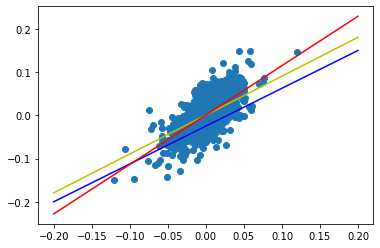

In [25]:
plt.figure()
plt.scatter(samsungRet['Mkt-Rf'], samsungRet['종가'])
plt.plot([-0.2, 0.2], [-0.2, 0.15] , c='blue')
plt.plot([-0.2, 0.2], [-0.2 * w_init + b_init, 0.2 * w_init + b_init], c='y')
plt.plot([-0.2, 0.2], [-0.228,0.229], c='red')

In [22]:
w_init

0.8993159444903309

In [24]:
[-0.2 * w_init + b_init, -0.2 * w_init + b_init]

[-0.17933962748895027, -0.17933962748895027]

In [23]:
-0.2 * w_init + b_init

-0.22885651967333054

In [24]:
0.2* w_init + b_init

0.22984330156437416

In [27]:
b_init

-9521450595.163969

In [9]:
kospi = stock.get_market_ohlcv_by_date('20001226','20191231', 'kospi')
kospiRet = kospi[['종가']]/100

for i in range(1, kospi.shape[0]):
    kospiRet['종가'].iloc[i] = (kospi['종가'].iloc[i] - kospi['종가'].iloc[i-1])/kospi['종가'].iloc[i-1]


In [10]:
kospiRet = kospiRet[1:]
kospiRet

,종가
날짜,
2001-01-02,0.032361
2001-01-03,0.000921
2001-01-04,0.070172
2001-01-05,0.040913
2001-01-08,0.009985
...,...
2019-12-23,-0.000213
2019-12-24,-0.006185
2019-12-26,0.003584


In [22]:
np.corrcoef(samsungRet['종가'], kospiRet['종가'])

array([[1.        , 0.60995946],
       [0.60995946, 1.        ]])